In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#한글 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

- Empirical cumulative distribution functions
    - 경험적 누적확률분포, 누적확률분포 시각화
    - 확률변수에 대한 확률을 모두 더하여 누적 값을 만든 것

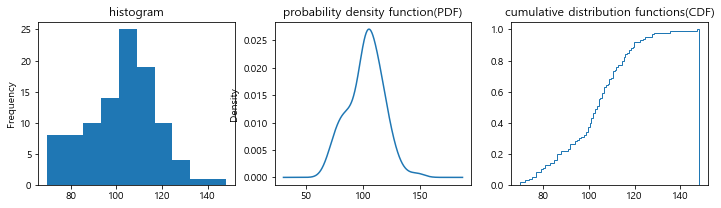

In [3]:
# 평균 100, 표편 15인 정규분포 데이터 100개 랜덤변수 분포 시각화
mu, sigma = 100, 15
x = pd.Series(np.random.normal(mu, sigma, size=100))
plt.figure(figsize=(12,3))

#plot the histogram
plt.subplot(131)
x.plot.hist(x)
plt.title('histogram')

#plot the kernel density estimation
plt.subplot(132)
x.plot.kde()
plt.title('probability density function(PDF)')

#plot the cumulatice histogram
plt.subplot(133)
n_bins = 100
n, bins, patches = plt.hist(x, n_bins, density=True, histtype='step', cumulative=True)
plt.title('cumulative distribution functions(CDF)')
plt.show()

Empirical cumulatice distribution functions

학생 성적 데이터에 대한 경험적 누적 분포 함수(ecdf) 시각화 코드

,num,score,rank,rankD,rankN
0,1,100.0,30,1,1.000000
1,2,93.0,24,7,0.793103
2,3,91.6,22,9,0.724138
3,4,93.2,25,6,0.827586
4,5,78.0,9,22,0.275862


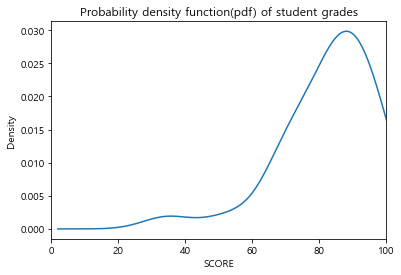

In [5]:
#성적 데이터 로드
s = pd.read_csv('./data/scores1108.csv')

#점수에 대한 등수
s['rank'] = s['score'].rank()
s['rank'] = s['rank'].astype('int32')
s['rankD'] = s['score'].rank(ascending = False)
s['rankD'] = s['rankD'].astype('int32')

#등수 정규화
s['rankN'] = (s['rank'] - s['rank'].min()) / (s['rank'].max() - s['rank'].min())
display(s.head())

#점수에 대한 확률밀도함수 시각화
s['score'].plot.density()
plt.xlabel('SCORE')
plt.xlim(0, 100)
plt.title('Probability density function(pdf) of student grades')
plt.show()


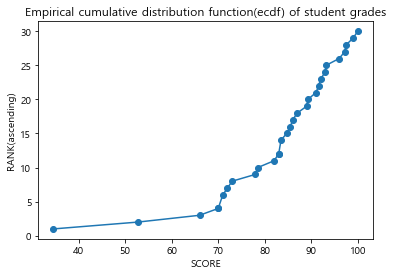

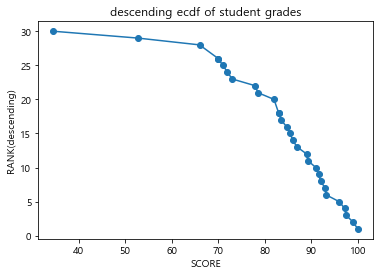

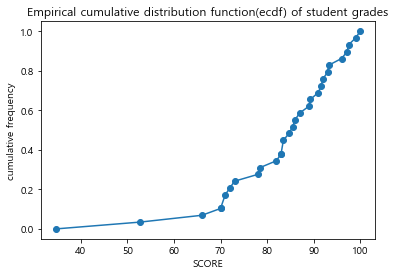

In [7]:
#점수순으로 정렬한 순위 그래프로 경험적 누적분포 시각화
s1 = s.sort_values(by='score')
plt.plot(s1['score'], s1['rank'], 'o-')
plt.xlabel('SCORE')
plt.ylabel('RANK(ascending)')
plt.title('Empirical cumulative distribution function(ecdf) of student grades')
plt.show()

#점수 역순으로 정렬한 역순위그래프로 경험적 누적분포 시각화
s2 = s.sort_values(by='score', ascending=False)
plt.plot(s2['score'], s2['rankD'], 'o-')
plt.xlabel('SCORE')
plt.ylabel('RANK(descending)')
plt.title('descending ecdf of student grades')
plt.show()

#점수순으로 정렬한 누적확률 그래프로 경험적누적분포시각화 (normalization)
s1 = s.sort_values(by='score')
plt.plot(s1['score'], s1['rankN'], 'o-')
plt.xlabel('SCORE')
plt.ylabel('cumulative frequency')
plt.title('Empirical cumulative distribution function(ecdf) of student grades')
plt.show()

q-q plot으로 점수데이터가 정규분포를 따르는지 확인 예

C:\201814471\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\201814471\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


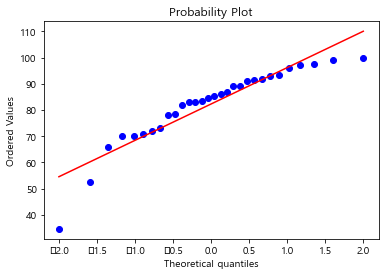

C:\201814471\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


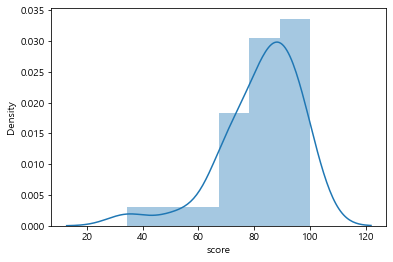

In [9]:
from scipy import stats
stats.probplot(s1['score'], plot=plt)
plt.show()

import seaborn as sns
sns.distplot(s1['score'])
plt.show()

Box plot 예

표준정규분포 데이터셋 4개에 대한 box plot & density plot

,A,B,C,D
0,-0.342275,-0.974244,-0.039163,1.049610
1,-0.219769,-0.148019,1.587265,0.237159
2,-0.811526,-0.305049,-2.901304,-0.301214
3,-0.573312,-2.126643,1.053689,-0.356169
4,-1.007258,-1.143694,-0.569599,0.136366
5,0.634845,0.165467,-0.199803,-1.462467
6,0.506140,-1.256233,-0.046189,1.314558
7,0.295136,0.511456,0.259921,0.414857
8,0.065919,0.932078,0.057086,1.452415
9,1.155818,0.044349,1.025891,0.405440


C:\201814471\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\201814471\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


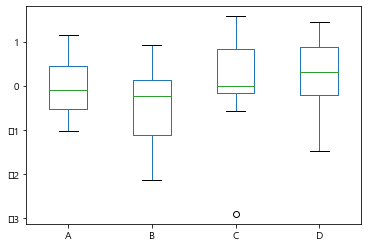

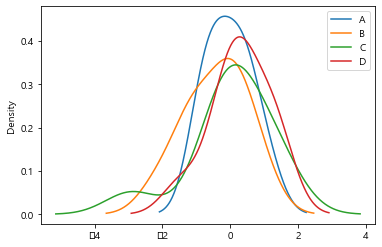

<AxesSubplot:>

C:\201814471\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\201814471\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


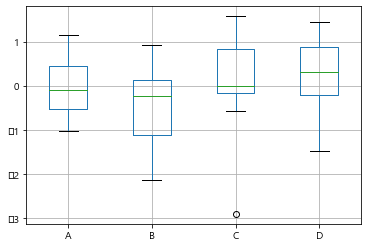

In [22]:
np.random.seed(1423)
df = pd.DataFrame(np.random.randn(10, 4), columns = ['A', 'B', 'C', 'D'])

display(df)
df.plot.box()
df.plot.density()
plt.show()
df.boxplot()

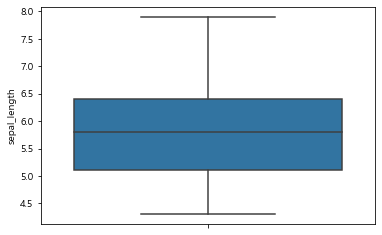

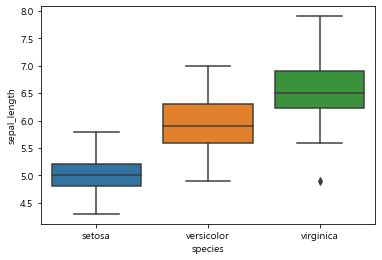

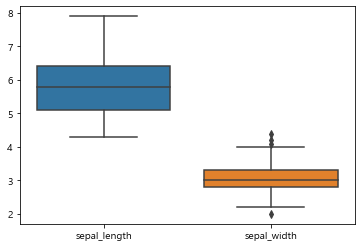

In [26]:
#iris dataset 예
import seaborn as sns
df = sns.load_dataset('iris')

sns.boxplot(y=df['sepal_length'])
plt.show()

#3개 붓꽃종류, 하나의 속성값
sns.boxplot(x=df['species'], y=df['sepal_length'])
plt.show()

#2개 속성값
sns.boxplot(data=df.iloc[:, 0:2])
plt.show()

Violin Plot
- 데이터 분포와 확률 밀도를 시각화 하는데 사용
- Box plot과 density ploy을 결합한 형태
- 모양
    - 가운데 흰색 점 : 중앙값
    - 가운데 두꺼운 검은 막대 : 사분위수 범위
    - 검은막대에서 연장된 검은 선 : 데이터에서 인접한 상위(최대) 및 하위(최소) 값
    - 보라색 영역 : density  plot

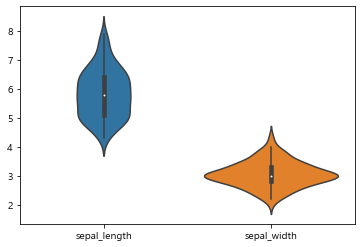

In [27]:
data = df.iloc[:, 0:2]
sns.violinplot(data= data)
plt.show()